In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Данные для регрессии

In [2]:
!gdown 1WbpJZBk-e-Y8KC-WtWzvJuLcEWwYd3qn
df = pd.read_csv('/content/sample.csv')
try:
  df = df.drop(columns='Unnamed: 0')
  df.head()
except:
  df.head()

Downloading...
From: https://drive.google.com/uc?id=1WbpJZBk-e-Y8KC-WtWzvJuLcEWwYd3qn
To: /content/sample.csv
100% 627k/627k [00:00<00:00, 17.5MB/s]


In [3]:
df.head()

,feature1,feature_new,y
0,0.582624,1.515718,34.361468
1,-1.310930,-1.763046,-110.037744
2,-0.762516,-1.398488,161.519668
3,0.177450,0.920545,2.619852
4,-1.306872,-2.471682,81.517359


In [4]:
df.head()

,feature1,feature_new,y
0,0.582624,1.515718,34.361468
1,-1.310930,-1.763046,-110.037744
2,-0.762516,-1.398488,161.519668
3,0.177450,0.920545,2.619852
4,-1.306872,-2.471682,81.517359


# Подготовка данных

In [5]:
features = list(df.columns)
target = 'y'
try:
  features.remove(target)
except Exception as e:
  print(e)

In [6]:
features

['feature1', 'feature_new']

In [7]:
X = df[features]
try:
  y = df[target]
except Exception as e:
  print(e)

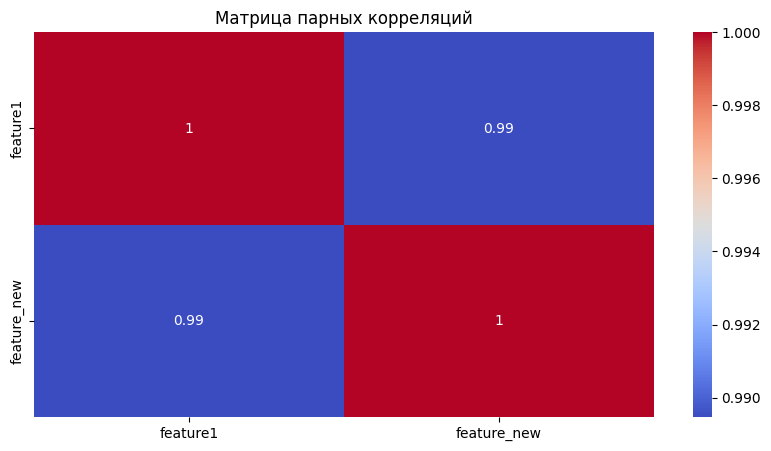

In [8]:
# Расчет матрицы парных корреляций

correlation_matrix = X.corr()

# Визуализация матрицы парных корреляций
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

In [9]:
# разделение данных на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X_train.corr()

,feature1,feature_new
feature1,1.000000,0.989409
feature_new,0.989409,1.000000


In [11]:
# Нормализация признаков для лучшей сходимости. Рассказать про важность нормализации именно для регуляризации
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# задаем интервал перебора для alpha
# альфа зависит от размера выборки

start = 0.0      # Начальное значение диапазона
stop = 1000       # Конечное значение диапазона (не включается в результат)
step = 10       # Шаг между значениями
float_range = np.arange(start, stop, step)
print(float_range)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360. 370. 380. 390. 400. 410.
 420. 430. 440. 450. 460. 470. 480. 490. 500. 510. 520. 530. 540. 550.
 560. 570. 580. 590. 600. 610. 620. 630. 640. 650. 660. 670. 680. 690.
 700. 710. 720. 730. 740. 750. 760. 770. 780. 790. 800. 810. 820. 830.
 840. 850. 860. 870. 880. 890. 900. 910. 920. 930. 940. 950. 960. 970.
 980. 990.]


# RIDGE  регрессия

In [13]:
R_2_scores = []
avg_coefficients = []
mae_list = []
mse_list = []
for alpha in float_range:

  if alpha == 0:
    model = LinearRegression()
  else:
    model = Ridge(alpha=alpha, max_iter=1000) # alpha — величина регуляризации
  # Обучение модели на обучающих данных.
  model.fit(X_train_scaled, y_train)
  y_pred_test = model.predict(X_test_scaled)
  # Оценка качества модели на тестовых данных.
  mse = mean_squared_error(y_test, y_pred_test )
  mse_list.append(mse)

  # Веса (коэффициенты) модели с L1-регуляризацией.
  coefficients = model.coef_
  avg_coefficients.append(coefficients)

In [14]:
avg_coefficients = np.transpose(avg_coefficients)

In [15]:
x = float_range
y = avg_coefficients
selected_y = y[0]
# Create traces
fig = go.Figure()
for i, feature in enumerate(features):
# for i in range(10):
  selected_y = y[i]
  fig.add_trace(go.Scatter(x=x, y=selected_y,
                mode='lines',
                name=feature))


fig.add_trace(go.Scatter(x=x, y=mse_list,
                mode='lines',
                name='mse'))
fig.show()
# график интерактивный (нажмите мышкой на feature_new, feature1, mse)

По графику видно, что оптимальным коэффициентом регуляризации является значение 50, где достигается наименьшая ошибка

# LASSO  регрессия

In [16]:
start = 0.0      # Начальное значение диапазона
stop = 0.2     # Конечное значение диапазона (не включается в результат)
step = 0.001       # Шаг между значениями

float_range = np.arange(start, stop, step)


In [17]:
R_2_scores = []
avg_coefficients = []
mae_list = []
mse_list = []

# Нормализация признаков для лучшей сходимости.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for alpha in float_range:

  if alpha == 0:
    model = LinearRegression()
  else:
    model = Lasso(alpha=alpha, max_iter=1000)
  # Обучение модели на обучающих данных.
  model.fit(X_train_scaled, y_train)
  y_pred_test = model.predict(X_test_scaled)
  # Оценка качества модели на тестовых данных.
  mse = mean_squared_error(y_test, y_pred_test )
  mse_list.append(mse)
  # Веса (коэффициенты) модели с L1-регуляризацией.
  coefficients = model.coef_
  avg_coefficients.append(coefficients)
avg_coefficients = np.transpose(avg_coefficients)


In [18]:
x = float_range
y = avg_coefficients
selected_y = y[0]
# Create traces
fig = go.Figure()
for i, feature in enumerate(features):
# for i in range(10):
  selected_y = y[i]
  fig.add_trace(go.Scatter(x=x, y=selected_y,
                mode='lines',
                name=feature))
fig.add_trace(go.Scatter(x=x, y=mse_list,
                mode='lines',
                name='mse'))
fig.show()
# график интерактивный (нажмите мышкой на feature_new, feature1, mse)

По графику видно, что оптимальным коэффициентом регуляризации является значение 0.03, где достигается наименьшая ошибка

# Сравним как работает линейная регрессия и регрессии с регуляризацией для оптимального значения параметра регуляризации

In [19]:
# построим линейную регрессию
model = LinearRegression()

model.fit(X_train_scaled, y_train)
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model.coef_

In [20]:
mse_test, mse_train

(10345.441528357813, 9871.550379011118)

In [21]:
coefficients

array([10.70350945, -2.79069558])

In [22]:
# построим линейную регрессию
# model = LinearRegression()
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train_scaled, y_train)
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model.coef_

In [23]:
model.intercept_

array([0.14248731])

In [24]:
mse_test, mse_train

(10348.198219616856, 9874.27769377846)

In [25]:
coefficients

array([ 7.63980729, -0.50212894])

мы получили модель y = -1.2639155750313074 + 10.70350945 * feature1 - 2.79069558 * feature_new

В данных наблюдается мультиколлинеарность, возможно по этой причине коэффициенты слишком высокие


Проведем регуляризацию L1 и L2






In [26]:
# построим регрессию Лассо с оптимальным параметром регуляризации, который мы подобрали перебором
model_reg = Lasso(alpha=0.03, max_iter=1000) # alpha — величина регуляризации

# обучение
model_reg.fit(X_train_scaled, y_train)
y_pred_test = model_reg.predict(X_test_scaled)
y_pred_train = model_reg.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model_reg.coef_

In [27]:
mse_test, mse_train

(10345.058696895247, 9871.715363118346)

In [28]:
model.intercept_

array([0.14248731])

In [29]:
coefficients

array([ 7.9123688, -0.       ])

In [30]:
print(f'ТО есть мы получили модель y = {model.intercept_[0]} + {coefficients[0]} * feature1 + {coefficients[1]} * feature_new')

ТО есть мы получили модель y = 0.14248731395288972 + 7.912368795113259 * feature1 + -0.0 * feature_new


In [31]:
# построим регрессию Лассо с оптимальным параметром регуляризации, который мы подобрали перебором
model_reg = Ridge(alpha=50, max_iter=10000) # alpha — величина регуляризации

# обучение
model_reg.fit(X_train_scaled, y_train)
y_pred_test = model_reg.predict(X_test_scaled)
y_pred_train = model_reg.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model_reg.coef_

In [32]:
mse_test, mse_train

(10345.187376527107, 9871.707614391493)

In [33]:
model.intercept_

array([0.14248731])

In [34]:
coefficients

array([ 7.97167858, -0.08717356])

In [35]:
print(f'ТО есть мы получили модель y = {model.intercept_[0]} + {coefficients[0]} * feature1 + {coefficients[1]} * feature_new')

ТО есть мы получили модель y = 0.14248731395288972 + 7.971678583310963 * feature1 + -0.08717356313089523 * feature_new


Модель с регуляризацией L1 занулила коэффициент при feature1, модель с L2 регуляризацией снизила коэффициент

# Классификация

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [37]:
# Функция для вывода значимости признаков
def print_feature_importance(model, feature_names):
    importance = np.abs(model.coef_[0])
    feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
    print(feature_importance)

In [38]:
# Создание исходного набора данных
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Преобразуем в DataFrame для удобства
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Создаем дополнительные признаки с высокой корреляцией
df['feature_10'] = df['feature_0'] * 0.8 + np.random.normal(0, 0.3, size=df.shape[0])
df['feature_11'] = df['feature_1'] * 0.8 + np.random.normal(0, 0.9, size=df.shape[0])
df['feature_12'] = df['feature_2'] * 0.8 + np.random.normal(0, 0.9, size=df.shape[0])



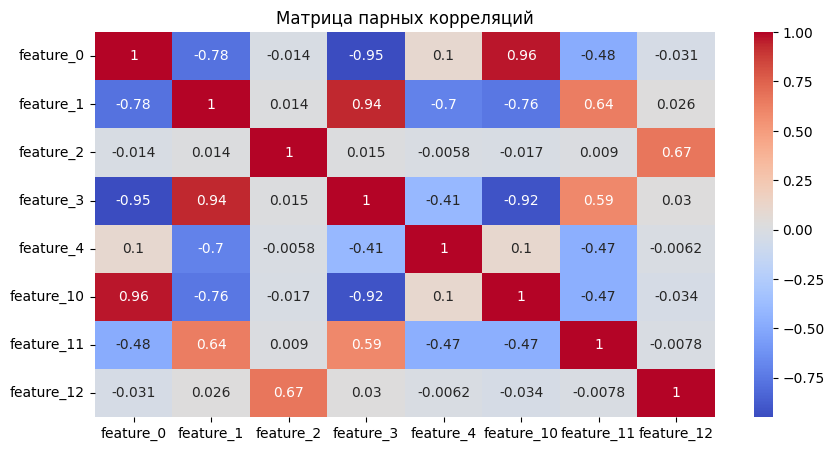

In [39]:
# Расчет матрицы парных корреляций
correlation_matrix = df.corr()
# Визуализация матрицы парных корреляций
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

In [40]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1].sort_values(ascending=False).drop_duplicates()
df_corr_pairs = pd.DataFrame(corr_pairs).reset_index()
df_corr_pairs.columns = ['feature_1', 'feature_2', 'corr']
df_corr_pairs.sort_values('corr')

,feature_1,feature_2,corr
27,feature_3,feature_0,-0.949966
26,feature_10,feature_3,-0.918852
25,feature_1,feature_0,-0.779008
24,feature_1,feature_10,-0.756166
23,feature_1,feature_4,-0.701895
22,feature_0,feature_11,-0.481502
21,feature_11,feature_10,-0.468539
20,feature_4,feature_11,-0.466714
19,feature_3,feature_4,-0.405943
18,feature_12,feature_10,-0.034292


In [41]:

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)


## Логистическая регрессия без регуляризации

In [42]:
# Логистическая регрессия без регуляризации
log_reg = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict_proba(X_train)[:, 1]
y_test_pred = log_reg.predict_proba(X_test)[:, 1]
print("Логистическая регрессия без регуляризации")
print("ROC AUC на трейне:", roc_auc_score(y_train, y_train_pred))
print("ROC AUC на тесте:", roc_auc_score(y_test, y_test_pred))

print_feature_importance(log_reg, df.columns)

Логистическая регрессия без регуляризации
ROC AUC на трейне: 0.9185689559452663
ROC AUC на тесте: 0.9540117416829745
feature_0     1.479392
feature_3     0.684700
feature_4     0.551431
feature_1     0.422194
feature_12    0.155121
feature_10    0.108058
feature_2     0.101636
feature_11    0.054009
dtype: float64


## Логистическая регрессия с L1-регуляризацией (Lasso)

In [43]:
param_grid_l1 = {
    'logreg__C': np.logspace(-1, 1, 20)
}
pipe_l1 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', solver='saga', max_iter=10000))
])
grid_l1 = GridSearchCV(pipe_l1, param_grid_l1, cv=5)
grid_l1.fit(X_train, y_train)
y_train_pred_l1 = grid_l1.predict_proba(X_train)[:, 1]
y_test_pred_l1 = grid_l1.predict_proba(X_test)[:, 1]
print("Логистическая регрессия с L1-регуляризацией")
print("ROC AUC на трейне:", roc_auc_score(y_train, y_train_pred_l1))
print("ROC AUC на тесте:", roc_auc_score(y_test, y_test_pred_l1))

print("Значимость признаков (L1-регуляризация):")
print_feature_importance(grid_l1.best_estimator_.named_steps['logreg'], df.columns)


Логистическая регрессия с L1-регуляризацией
ROC AUC на трейне: 0.9176545507984717
ROC AUC на тесте: 0.9557907845579079
Значимость признаков (L1-регуляризация):
feature_0     2.337366
feature_4     0.136068
feature_12    0.014547
feature_1     0.000000
feature_2     0.000000
feature_3     0.000000
feature_10    0.000000
feature_11    0.000000
dtype: float64


In [44]:
grid_l1.best_params_

{'logreg__C': 0.1}

## Логистическая регрессия с L2-регуляризацией (Ridge)

In [45]:
param_grid_l2 = {
    'logreg__C': np.logspace(-20, 20, 50)
}
pipe_l2 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2', solver='saga', max_iter=10000))
])
grid_l2 = GridSearchCV(pipe_l2, param_grid_l2, cv=5)
grid_l2.fit(X_train, y_train)
y_train_pred_l2 = grid_l2.predict_proba(X_train)[:, 1]
y_test_pred_l2 = grid_l2.predict_proba(X_test)[:, 1]
print("Логистическая регрессия с L2-регуляризацией")
print("ROC AUC на трейне:", roc_auc_score(y_train, y_train_pred_l2))
print("ROC AUC на тесте:", roc_auc_score(y_test, y_test_pred_l2))

print("Значимость признаков (L2-регуляризация):")
print_feature_importance(grid_l2.best_estimator_.named_steps['logreg'], df.columns)


Логистическая регрессия с L2-регуляризацией
ROC AUC на трейне: 0.9186995852519512
ROC AUC на тесте: 0.9539227895392278
Значимость признаков (L2-регуляризация):
feature_0     1.458965
feature_3     1.036651
feature_4     0.911530
feature_1     0.460855
feature_12    0.184593
feature_2     0.093340
feature_11    0.057762
feature_10    0.020539
dtype: float64


In [46]:
grid_l2.best_params_

{'logreg__C': 2.559547922699533}

## Логистическая регрессия с Elastic Net регуляризацией

In [47]:
param_grid_elastic = {
    'logreg__C': np.logspace(-1, 1, 10),
    'logreg__l1_ratio': np.linspace(0, 1, 10)  # параметр смешивания L1 и L2
}
pipe_elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000))
])
grid_elastic = GridSearchCV(pipe_elastic, param_grid_elastic, cv=5)
grid_elastic.fit(X_train, y_train)
y_train_pred_elastic = grid_elastic.predict_proba(X_train)[:, 1]
y_test_pred_elastic = grid_elastic.predict_proba(X_test)[:, 1]
print("Логистическая регрессия с Elastic Net регуляризацией")
print("ROC AUC на трейне:", roc_auc_score(y_train, y_train_pred_elastic))
print("ROC AUC на тесте:", roc_auc_score(y_test, y_test_pred_elastic))

print("Значимость признаков (Elastic Net регуляризация):")
print_feature_importance(grid_elastic.best_estimator_.named_steps['logreg'], df.columns)


Логистическая регрессия с Elastic Net регуляризацией
ROC AUC на трейне: 0.9186097776036054
ROC AUC на тесте: 0.9540117416829745
Значимость признаков (Elastic Net регуляризация):
feature_0     1.759859
feature_3     0.919639
feature_4     0.583032
feature_12    0.157958
feature_2     0.065232
feature_10    0.049490
feature_11    0.036301
feature_1     0.000000
dtype: float64


In [48]:
grid_elastic.best_params_

{'logreg__C': 0.774263682681127, 'logreg__l1_ratio': 0.5555555555555556}